Prelecture HW

1.

A simple linear regression model is a statistical model that predicts the relationship between the independent and dependent variable, assuming that they have a linear relationship. Changes in the independent variable results in proportional changes in the dependent variable. The independent variable is known as the predictor, it influences and predicts changes in the dependent variable, it is on the x-axis of a graph. The dependent variable is also known as the outcome, it is the variable we want to explain based on changes in the predictor, it is on the y-axis of a graph. Because they have a linear relationship, the slope tells us how much the outcome increases as the predictor changes, showing the strength and direction of change. The intercept is what we expect the outcome to be when the predictor is 0, and error term is the difference between the actual outcome and the value predicted by the regression line. The equation for a simple linear regression model is y=intercept+(slope×x)+error. When combining the line with normally distributed errors, the outcome y ends up being normally distributed around the line for each value of x. Therefore, when we look at all the predicted y values, they form a pattern that can be seen as a sample from a normal distribution.

In [7]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Parameters for our theoretical model
intercept = 5            # Intercept of the theoretical model
slope = 1.5              # Slope of the theoretical model
error_std = 2            # Standard deviation of the normally distributed error
x_values = np.linspace(0, 10, 100)  # Predictor variable (x)

# Generate normally distributed errors and theoretical outcome variable y
errors = np.random.normal(0, error_std, size=x_values.shape)
y_values = intercept + slope * x_values + errors

# Create the scatter plot of the data points
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='markers', name='Data'))

# Add the theoretical model line (without fitting)
theoretical_y = intercept + slope * x_values
fig.add_trace(go.Scatter(x=x_values, y=theoretical_y, mode='lines', name='Theoretical Model'))

# Generate a normal distribution curve for the errors
error_range = np.linspace(-3 * error_std, 3 * error_std, 100)
pdf_values = norm.pdf(error_range, 0, error_std)  # Centered at 0, scaled by error std

# Plot the normal distribution of errors as a curve offset to one side (for visual clarity)
fig.add_trace(go.Scatter(
    x=error_range + x_values.mean(),  # Offset to display next to the data
    y=pdf_values * 15 + intercept,    # Scale and offset the PDF to align with the model
    mode='lines', 
    name="Error Distribution",
    line=dict(dash="dash", color="green")
))

# Configure layout
fig.update_layout(
    title="Theoretical Simple Linear Regression Model with Normally Distributed Errors",
    xaxis_title="Predictor (x)",
    yaxis_title="Outcome (y)",
    showlegend=True
)

# Display plot
fig.show()

Summary of Chatbot Session 1: "In this session, we discussed how to demonstrate a theoretical Simple Linear Regression model in Python without fitting an actual model to the data. The goal was to illustrate the model's components, including the intercept, slope, and normally distributed errors, without using ordinary least squares or fitting a regression line to observed data.

Key steps included:
1. **Theoretical Model**: We set a linear relationship for the predictor and outcome, defining intercept, slope, and a normally distributed error term to simulate variability.
2. **Visualization with `plotly.graph_objects`**: We created a scatter plot of data points with added errors and included a line representing the theoretical relationship (without any fitting).
3. **Using `scipy.stats`**: We generated a normal distribution curve to represent the error distribution, visualizing the model’s assumption of normally distributed errors.

This approach focuses on illustrating the theoretical assumptions of Simple Linear Regression rather than on estimating or fitting coefficients."

Link to Chatbot Session 1: https://chatgpt.com/share/672be744-18bc-8005-a960-63f02f379d55

2)

In [8]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Set seed for reproducibility
np.random.seed(42)

# Parameters for the model
intercept = 5
slope = 1.5
error_std = 2

# Generate data
x_values = np.linspace(0, 10, 100)
errors = np.random.normal(0, error_std, size=x_values.shape)
y_values = intercept + slope * x_values + errors

# Create a DataFrame for statsmodels
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Fit the model
model = smf.ols('y ~ x', data=data).fit()
print(model.summary())

# Generate fitted values
fitted_y = model.predict(data['x'])

# Create the plot
fig = go.Figure()

# Scatter plot of the data points
fig.add_trace(go.Scatter(x=data['x'], y=data['y'], mode='markers', name='Data'))

# Add fitted model line
fig.add_trace(go.Scatter(x=data['x'], y=fitted_y, mode='lines', name='Fitted Model', line=dict(color='red')))

# Add theoretical model line for comparison
theoretical_y = intercept + slope * data['x']
fig.add_trace(go.Scatter(x=data['x'], y=theoretical_y, mode='lines', name='Theoretical Model', line=dict(dash='dash', color='blue')))

# Configure layout
fig.update_layout(
    title="Fitted Simple Linear Regression Model",
    xaxis_title="Predictor (x)",
    yaxis_title="Outcome (y)",
    showlegend=True
)

# Display plot
fig.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     596.5
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.85e-43
Time:                        04:37:50   Log-Likelihood:                -200.97
No. Observations:                 100   AIC:                             405.9
Df Residuals:                      98   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6544      0.362     12.856      0.0

3)

The theoretical model line is generated using the equation for a simple linear regression, without any noise or errors. This gives the ideal line, without any error. The fitted model line is calculated from the actual data, and has variability because of normally distributed random errors, but it give the best estimate of the relationship between the independent and dependent variable based on the data. The fitted model line is also an approximation of the theoretical line. The theoretical line is fixed and does not change, regardless of how many samples we draw, but the fitted line would change each time slightly with each new sample because theres the simulation of sampling random variation. Each time new data is simulated the noise causes minor changes in the line. 

4)

The fitted_model.fittedvalues are the predicted y values generated by a simple linear regression model. They are calculated using the estimated intercept and slope (from fitted_model.params), which are also shown in the "coef" column of the summary table (fitted_model.summary().tables[1]). The model takes the intercept for each data point, adds the product of the slope and the observed x value, and produces a fitted value (predicted y). This means fitted_model.fittedvalues gives the model's predictions for each x in the sample based on these estimated parameters.

Summary of Chatbot Session 2: "In this session, we focused on understanding the concepts and calculations involved in Simple Linear Regression, particularly around **theoretical and fitted models**, **in-sample predictions**, and **how fitted values are derived**:

1. **Theoretical vs. Fitted Model**: 
   - The **theoretical model line** represents the assumed true relationship between predictor and outcome variables, based on ideal parameters (intercept and slope) without sample noise.
   - The **fitted model line**, however, uses parameters estimated from actual sample data, capturing the influence of random sampling variation. Comparing these lines highlights how real-world data introduces variability.

2. **In-Sample Predictions and Fitted Values**:
   - In-sample predictions are the predicted `y` values for each `x` in the sample, based on the fitted model’s estimated intercept and slope.
   - These fitted values are calculated by plugging observed `x` values into the regression equation, using the parameters stored in `fitted_model.params` (or equivalently from the "coef" column in `fitted_model.summary().tables[1]`).

3. **Link to Summary Table**:
   - The estimated intercept and slope in `fitted_model.params` (or in the summary table) directly determine the fitted values, representing the model’s best guess of the relationship based on the sample.

Overall, this session clarified how regression models make predictions using estimated parameters, how these estimates differ from theoretical values, and how in-sample predictions are derived from real data. This highlights the role of sampling variation in creating fitted models that approximate, but may differ from, the theoretical model."

Link To Chatbot Session 2: https://chatgpt.com/share/672bff31-b5dc-8005-98bd-7675c85a0c0a

5)

In the ordinary least squares method, by making the distances between datapoints and the line as small as possible we are able to pick a line that best fits the data. The distances are residuals and the ordinary least squares method uses squares of the distances, multiplying each distance by itself. This makes all distances positive, and larger mistakes count more than smaller ones. 

6)

The first expression can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)" because it is the formula for R^2. This expression gives us the proportion of variation in Y, and if the value we get is closer to 1, the model explains a large portion of variability in Y, if it is closer to 0, the model explains little variability. The fitted_model.rsquared gives the R^2 value, and it is a measure of the accuracy or the goodness of the fit of the model. It measures how well the models predictions match the observed data. The two expressions np.corrcoef(Y,fitted_model.fittedvalues)[0,1]^2 and np.corrcoef(Y,x)[0,1]^2 capture the square of the correlation coefficient between the observed values Y and the predicted values from the model and square of the correlation coefficient between the observed values Y and the independent variable x.

Summary of Chatbot Session 3: "Sure! Here’s a summary of our session:

1. **Ordinary Least Squares (OLS) Explanation**: We discussed how the OLS method finds the best-fitting line by minimizing the sum of squared residuals, using squares to ensure positive contributions and emphasize larger errors. The blue trendline from `fitted_model` minimizes these residuals in the plot.

2. **Proportion of Variation Explained**: I explained that the expression \(1 - \frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}}\) represents the proportion of variation in \(Y\) explained by the model, known as \(R^2\). This shows how much of the outcome is accounted for by the model.

3. **Interpreting \(R^2\)**: We discussed how \(fitted\_model.rsquared\) measures model accuracy by quantifying the proportion of variance in the outcome that the model explains. Higher values indicate a better fit.

4. **Role of Correlation in Simple Linear Regression**: We covered the expressions \(\text{np.corrcoef}(Y, \text{fitted\_model.fittedvalues})[0,1]^2\) and \(\text{np.corrcoef}(Y, x)[0,1]^2\), explaining that both reflect \(R^2\) in simple linear regression due to the direct relationship between the independent variable and the fitted values.

Feel free to ask if you want more details on any specific part!"

Link to Chatbot Session 3: https://chatgpt.com/share/672c6669-b898-8005-a4ed-f8ee98037ceb

7)

A simple linear regression model assumes a linear relationship between the independent and dependant variable, but based on the scatter plot with a trendline, the data could show a more complex, possibly nonlinear relationship. There is an assumption that the differences between observed and predicted values have a constant variance across all levels of the independent variable, but the code could show. a non-constant variance if they reveal patterns or increased spread of residuals at higher levels of fertilizer use. 

Summary of Chatbot Session 4: "In this session, you provided code and data for a Simple Linear Regression (SLR) analysis examining the relationship between the amount of fertilizer used and crop yield. We discussed a couple of key assumptions of the SLR model that might not hold for your example data, based on the scatter plot and residuals histogram you displayed. Specifically, potential violations of linearity (a nonlinear relationship appears present) and homoscedasticity (non-constant variance of residuals) were highlighted. I also mentioned the potential issue with the normality of residuals, which may need further review for inference purposes. The discussion suggested that alternative modeling approaches (like polynomial regression) or data transformations could improve model fit and accuracy."

Link to Chatbot Session 4: https://chatgpt.com/share/672d3603-07b8-8005-8cb2-de067c9eaacc

"Week of Nov 4" HW

8)

In the simple linear regression model, "no linear association" null hypothesis is H0 : β1=0. β1 is the slope of the regression line, and this expression shows there is no linear relationship between the independent variable and the dependent variable. In the code provided, the p-value associated with the coefficient of the waiting variable tells us whether there is a statistically significant linear relationship between waiting and duration. It the value is less than 0.05, it is low and there is evidence against the null hypothesis, and vise-versa. If the null hypothesis is rejected, you would probably believe there is a linear relationship between the waiting time and the duration of eruptions of Old Faithful. If you fail to reject the null hypothesis, you may believe the evidence does not support a linear relationship. 

9)

In the code, we analyze whether there is a relationship between the duration of geyser eruptions and the waiting time before the eruption for "short wait times." We still run the analysis fitting a linear regression model to see if the waiting time predicts the duration of the eeruption. With the model, we obtain a coefficient or slope for waiting and a p-value that gives us information on whether or not the relationship is statistically significant. In similar manner to the full dataset, a low p-value signifies strong evidence of a relationship, therefore rejecting the null hypothesis. Higher p-value means weak evidence of a relationship, therefore we fail to reject the null hypothesis. 

Summary of Chatbot Session 5: "Here’s a summary of our session:

1. **Null Hypothesis in Simple Linear Regression**: We reviewed the null hypothesis in the context of Simple Linear Regression, which states there is no linear association between the independent and dependent variables (\(\beta_1 = 0\)).

2. **Old Faithful Geyser Data Analysis**:
   - We discussed analyzing the relationship between the `waiting` time before and the `duration` of Old Faithful Geyser eruptions using a linear regression model.
   - You are focusing on whether the relationship still holds when you restrict the data to shorter waiting times (less than 62, 64, and 66 minutes).
   - I explained how to interpret the p-value and the slope of the regression line to determine if there is evidence of a linear relationship for these restricted datasets.
   - We also discussed using a scatter plot with a trendline to visualize the relationship for short wait times and compare it to the full dataset.

If there’s anything specific you’d like to revisit or need further clarification on, feel free to let me know!"

Link to Chatbot Session 5: https://chatgpt.com/share/672d4c11-5cf0-8005-af7f-7b07dd1c9006

10.1)

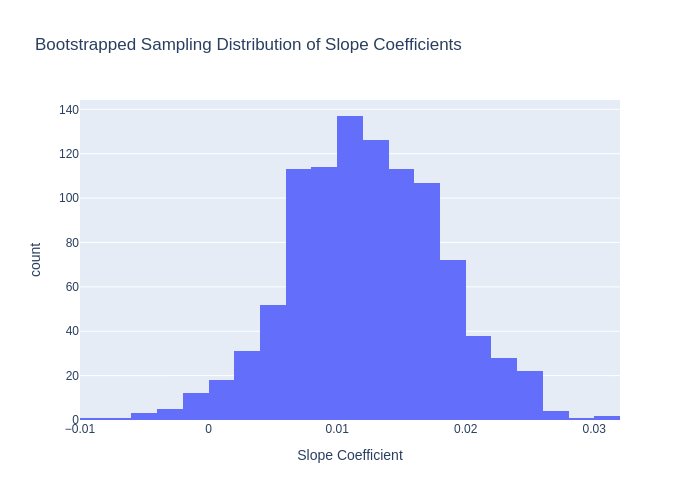

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

import plotly.express as px
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Define parameters
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
n_bootstrap_samples = 1000
slope_coefficients = []

# Create bootstrap samples and fit regression models
for _ in range(n_bootstrap_samples):
    bootstrap_sample = old_faithful[long_wait].sample(frac=1, replace=True)  # Resample with replacement
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope_coefficients.append(model.params['waiting'])  # Store the slope coefficient

# Convert to a DataFrame for visualization
slope_df = pd.DataFrame(slope_coefficients, columns=['Slope'])

# Visualize the bootstrapped sampling distribution
fig = px.histogram(slope_df, x='Slope', nbins=30, title='Bootstrapped Sampling Distribution of Slope Coefficients',
                   labels={'Slope': 'Slope Coefficient'})
fig.show(renderer="png")  # Use this renderer for GitHub and MarkUs submissions


10.2)

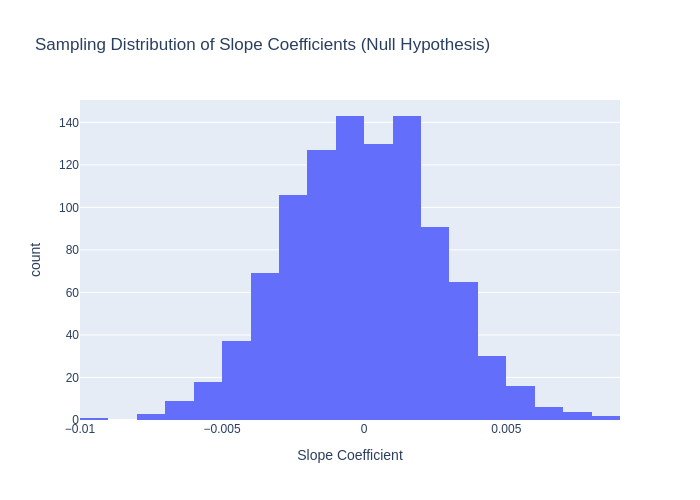

In [5]:
import numpy as np
import plotly.express as px
import pandas as pd
import statsmodels.formula.api as smf

# Parameters for the null model
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n_simulations = 1000
slope_coefficients = []

# Assuming `waiting` values come from `old_faithful`
waiting_values = old_faithful['waiting']

# Number of samples to simulate for each run
sample_size = 160

# Simulate samples and fit linear regression models
for _ in range(n_simulations):
    # Generate Y values under the null hypothesis: Y = β0 + ε, where ε ~ N(0, σ^2)
    simulated_y = beta_0 + beta_1 * waiting_values + np.random.normal(0, sigma, size=len(waiting_values))
    
    # Take a random sample of size n=160
    sampled_indices = np.random.choice(len(waiting_values), size=sample_size, replace=True)
    sampled_data = pd.DataFrame({
        'waiting': waiting_values.iloc[sampled_indices],
        'duration': simulated_y[sampled_indices]
    })
    
    # Fit a linear regression model on the sample
    model = smf.ols('duration ~ waiting', data=sampled_data).fit()
    slope_coefficients.append(model.params['waiting'])  # Store the slope coefficient

# Convert to DataFrame for visualization
slope_df = pd.DataFrame(slope_coefficients, columns=['Slope'])

# Visualize the sampling distribution
fig = px.histogram(slope_df, x='Slope', nbins=30, title='Sampling Distribution of Slope Coefficients (Null Hypothesis)',
                   labels={'Slope': 'Slope Coefficient'})
fig.show(renderer="png")  # Use this renderer for GitHub and MarkUs submissions


10.3)

In [6]:
import numpy as np
import statsmodels.formula.api as smf

# Compute the 95% confidence interval from the bootstrapped slope coefficients
lower_bound = np.percentile(slope_coefficients, 2.5)
upper_bound = np.percentile(slope_coefficients, 97.5)

# Check if 0 is within the confidence interval
contains_zero = lower_bound <= 0 <= upper_bound
print(f"95% Bootstrapped Confidence Interval for the Slope Coefficient: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Calculate the simulated p-value
# Under the null hypothesis, we count how many times the bootstrapped slopes are as extreme or more extreme than observed (two-tailed)
observed_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = observed_model.params['waiting']
simulated_p_value = (np.sum(np.abs(slope_coefficients) >= np.abs(observed_slope)) / len(slope_coefficients))
print(f"Simulated p-value: {simulated_p_value:.4f}")

# Report the p-value from the original model
original_p_value = observed_model.pvalues['waiting']
print(f"P-value from smf.ols fit: {original_p_value:.4f}")


95% Bootstrapped Confidence Interval for the Slope Coefficient: [-0.0052, 0.0051]
Does the 95% CI contain 0? Yes
Simulated p-value: 0.0000
P-value from smf.ols fit: 0.0381


Summary of Chatbot Session 6: "In this session, we focused on several statistical analyses and visualizations related to simple linear regression modeling:

1. **Bootstrapping Long Wait Times:** We started by creating and visualizing fitted Simple Linear Regression models for bootstrap samples using data where `waiting` times exceeded a specified threshold (`71`). The bootstrapped sampling distribution of the slope coefficients was collected and plotted to understand the variability in slope estimates.

2. **Simulation under Null Hypothesis:** Next, we simulated data under a null hypothesis of no linear association (setting the slope \(\beta_1 = 0\)) using the specified parameters (\(\beta_0 = 1.65\) and \(\sigma = 0.37\)). We generated simulated `Y` values based on `waiting` times, fit regression models on random samples, and visualized the distribution of the slope coefficients.

3. **Confidence Interval and P-value Assessment:** Finally, we computed and reported the 95% bootstrapped confidence interval for the slope coefficients to determine if it contained 0. We also compared a simulated p-value for testing the null hypothesis to the p-value from a model fit using `smf.ols` on the original data.

This process provided insights into the consistency and significance of observed relationships through bootstrapping and simulation methods."

Link to Chatbot Session 6: https://chatgpt.com/share/672d5006-db70-8005-9367-83962808faf5

11)

The model with the indicator function separates observations into two groups, long and not long, comparing their means and intercept shifts. The model smf.ols('duration ~ waiting', data=old_faithful) assumes a linear relationship between duration and waiting and fits a single line across all data points, while smf.ols('duration ~ waiting', data=old_faithful[short_wait])assumes a linear relationship for data points in the "short" waiting group and smf.ols('duration ~ waiting', data=old_faithful[long_wait])assumes a linear relationship for data points in the "long" waiting group. All of the models involve fitting a linear relationship, but the first indicator model splits data into two groups based on an indicator function and estimates a single contrast between the "long" and "not long" groups, therefore not directly modelling the relationship between duration and another continuous variable. The second models the linear relationship between duration and waiting using all data points without any group separation. The third and fourth model fits separate linear models to different subsets of the data based on conditions of whether its a short wait or long wait. For the model with the indicator function, the null hypothesis would be that there is no difference between the groups, and the alternative hypothesis would be that there is a difference between the groups. Evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model would be the p-value being less than the significance level (0.05). We can also look at the t-value, as a larger absolute t-value typically indicates stronger evidence against the null hypothesis.

Summary of Chatbot Session 7: "Here's a summary of our session:

1. **Model Specification Contextualization**: We discussed different model specifications, including an indicator-variable-based model and OLS regressions on subsets of data. I explained the similarities and differences between using indicator variables for group comparisons and fitting linear models on specific data subsets.

2. **Null Hypothesis Testing**: You asked about testing the null hypothesis of "no difference between groups on average" in the context of an indicator-based model. I outlined the steps for hypothesis testing, focusing on evaluating the significance of a contrast coefficient using t-statistics and p-values.

3. **Regression Analysis Execution**: You requested the execution of a regression model using the "Old Faithful" dataset to assess the relationship between `duration` and `waiting` time. Unfortunately, I encountered connectivity limitations when attempting to load data directly from Seaborn.

4. **Analyzing `kind` as a Categorical Predictor**: You shared code for fitting an OLS model with `kind` as a categorical variable and visualizing `duration` differences between "short" and "long" categories using a box plot. I provided an explanation of what the regression results and visualization would show in terms of group differences.

Please let me know if there's any specific part you'd like more detail on or if there is anything else you want to explore!"

Link to Chatbot Session 7: https://chatgpt.com/share/672d8e82-f8a8-8005-8412-585817fd2811

12)

The histogram that suggests the distribution of error terms is closest to normal is the one with symmetry around zero, a bell-shaped curve, and matches with the overlaid normal distribution curve. Because of this, model one often tends to be closer to normality in such cases, as if the other models show significant skewness, heavy tails, or multiple peaks, they do not support the normality assumption as well as Model 1 might. 

13)

A)

In [3]:
import numpy as np

# Replace with actual data from your "short wait" and "long wait" groups
short_wait = np.array([1.5, 2.0, 2.1, 2.3, 2.5, 2.4, 2.8, 3.0, 2.7])  # Example short wait times
long_wait = np.array([3.5, 4.0, 4.2, 4.5, 4.3, 4.8, 5.0, 5.2, 5.1])  # Example long wait times

# Step 1: Calculate the observed difference in means
observed_diff = np.mean(long_wait) - np.mean(short_wait)

# Combine the data
combined_data = np.concatenate([short_wait, long_wait])

# Number of permutations (for a more accurate test, use a larger number)
n_permutations = 10000
permuted_diffs = []

# Step 2: Shuffle the labels and calculate the difference in means
for _ in range(n_permutations):
    np.random.shuffle(combined_data)
    permuted_short = combined_data[:len(short_wait)]  # Assign first part to 'short'
    permuted_long = combined_data[len(short_wait):]  # Assign second part to 'long'
    
    # Calculate the difference in means for the shuffled data
    permuted_diff = np.mean(permuted_long) - np.mean(permuted_short)
    permuted_diffs.append(permuted_diff)

# Step 3: Calculate the p-value
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"Observed Difference in Means: {observed_diff}")
print(f"p-value: {p_value}")


Observed Difference in Means: 2.1444444444444444
p-value: 0.0


B)

In [4]:
import numpy as np

# Example data (replace with your actual data)
short_wait = np.array([1.5, 2.0, 2.1, 2.3, 2.5, 2.4, 2.8, 3.0, 2.7])  # Short wait times
long_wait = np.array([3.5, 4.0, 4.2, 4.5, 4.3, 4.8, 5.0, 5.2, 5.1])  # Long wait times

# Number of bootstrap samples (e.g., 10,000 for a more reliable estimate)
n_bootstrap = 10000
bootstrap_mean_differences = []

# Step 1: Perform bootstrap sampling
for _ in range(n_bootstrap):
    # Resample with replacement from both groups
    boot_short = np.random.choice(short_wait, size=len(short_wait), replace=True)
    boot_long = np.random.choice(long_wait, size=len(long_wait), replace=True)
    
    # Step 2: Calculate the mean difference between the two resampled groups
    mean_diff = np.mean(boot_long) - np.mean(boot_short)
    bootstrap_mean_differences.append(mean_diff)

# Step 3: Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
bootstrap_mean_differences = np.array(bootstrap_mean_differences)
ci_95 = np.quantile(bootstrap_mean_differences, [0.025, 0.975])

print(f"Bootstrap 95% Confidence Interval for the Difference in Means: {ci_95}")


Bootstrap 95% Confidence Interval for the Difference in Means: [1.7        2.58888889]


a) 

The permutation test checks if the difference between short wait and long wait is due to chance or if it's statistically significant. It assumes the null hypothesis, which states there is no real difference between the groups, meaning they come from the same population. The test combines the data from both groups, randomly shuffles the group labels, and splits the data into two new groups, calculating the mean difference each time. This process is repeated many times to create a distribution of differences under the null hypothesis. The p-value is then calculated by comparing the observed difference to this distribution, with a small p-value indicating that the observed difference is statistically significant.

The bootstrap method estimates the uncertainty around a statistic, like the difference in means between two groups. It works by resampling the original data with replacement, calculating the mean difference for each resample, and repeating this process many times. The 95% confidence interval is then determined using the 2.5th and 97.5th percentiles of the resampled differences. This method doesn’t assume a specific data distribution and helps measure the variability of the statistic.

b)

The indicator variable model is a parametric method that assumes normal errors to estimate group effects. The permutation test and bootstrap sampling are non-parametric, using resampling to test hypotheses and estimate uncertainty, without assuming a specific data distribution. The main difference is that the indicator model relies on assumptions, while the other two methods are more flexible.

Summary of Chatbot Session 8: "Here’s a summary of the key points discussed in this session:

1. **Statistical Methods for Comparing Groups**:
   - **Permutation Test**: A non-parametric test used to assess the difference in means between two groups by shuffling the group labels and recalculating the statistic of interest. It does not assume any distribution for the data.
   - **Bootstrap Sampling**: A non-parametric method that resamples data with replacement to create a distribution of the statistic (such as the difference in means) and then calculates confidence intervals based on the resampled data.
   - **Indicator Variable Model Approach**: A parametric method that uses a regression model with an indicator (dummy) variable to compare groups. It assumes normally distributed error terms and estimates group differences through model coefficients.

2. **Comparison of Approaches**:
   - **Indicator Variable Model**: Assumes normality of errors and provides an estimate of the difference in means (like the contrast between "short" and "long" wait groups) through regression coefficients.
   - **Permutation Test**: Provides a p-value by comparing the observed difference in means to the distribution of differences generated through label shuffling, making no assumptions about the error distribution.
   - **Bootstrap Sampling**: Generates a confidence interval for the difference in means by resampling the observed data, without assuming a specific error distribution.

3. **Similarities**:
   - All three methods compare the difference in means between two groups ("short" and "long").
   - Both the **indicator variable model** and **bootstrap sampling** provide confidence intervals, while the **permutation test** provides a p-value for hypothesis testing.

4. **Differences**:
   - The **indicator variable model** is parametric and assumes normal errors, while the **permutation test** and **bootstrap sampling** are non-parametric and do not rely on distributional assumptions.
   - **Permutation test** and **bootstrap sampling** are more flexible and can be applied to a wide range of statistics, while the **indicator variable model** is based on the linear regression framework.

This session focused on exploring these statistical methods in the context of comparing groups based on wait time, with an emphasis on understanding their assumptions, outputs, and how they can be applied to hypothesis testing and estimation."

Link to Chatbot Session 8: https://chatgpt.com/share/672d965a-c33c-8005-bb9d-515b1db889dc

14) Somewhat